In [1]:
import IPython
from noise_reduce import noisereduce as nr
import soundfile as sf   # 读wav格式
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
from pydub import AudioSegment # 读acc格式，pydub 对于 AAC 文件的处理可能依赖于 FFmpeg，因此需要确保系统中已安装 FFmpeg。
%matplotlib inline
print('import finished')

import finished


# Load data
A short audio which includes three types is shown below. The left part is voice from keybord, which is defined as noise.
The middle part is mixed with keybord voice and human talk. the last part is from human's voice.

In [2]:
# 文件路径
file_path = 'assets/audio/three_types_of_voice.aac'

# 读取音频文件
audio = AudioSegment.from_file(file_path, format="aac")

# 将 AudioSegment 转换为 NumPy 数组
source_audio = np.array(audio.get_array_of_samples())
# 获取采样率
source_audio_sample_rate = audio.frame_rate


# 打印一些信息
print("数据类型:", type(source_audio))
print("数据形状:", source_audio.shape)
print("采样率:", source_audio_sample_rate)

数据类型: <class 'numpy.ndarray'>
数据形状: (507904,)
采样率: 44100


In [3]:
print(type(source_audio[1]))
print(audio.sample_width)


<class 'numpy.int16'>
2


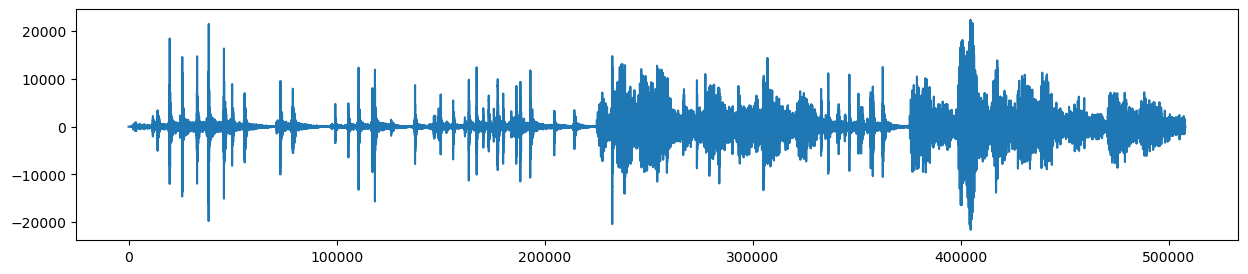

In [4]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(source_audio)

## Stationary remove noise

### noise

In [5]:
# 文件路径

noise_file_path = 'assets/audio/keyboard_noise_audio.aac'

# 使用 pydub 读取 AAC 文件
audio = AudioSegment.from_file(noise_file_path, format="aac")

# 将 AudioSegment 转换为 NumPy 数组
noise_data = np.array(audio.get_array_of_samples())
# 获取采样率
sample_rate = audio.frame_rate

# 打印一些信息
print("数据类型:", type(noise_data))
print("数据形状:", noise_data.shape)
print("采样率:", sample_rate)

数据类型: <class 'numpy.ndarray'>
数据形状: (210944,)
采样率: 48000


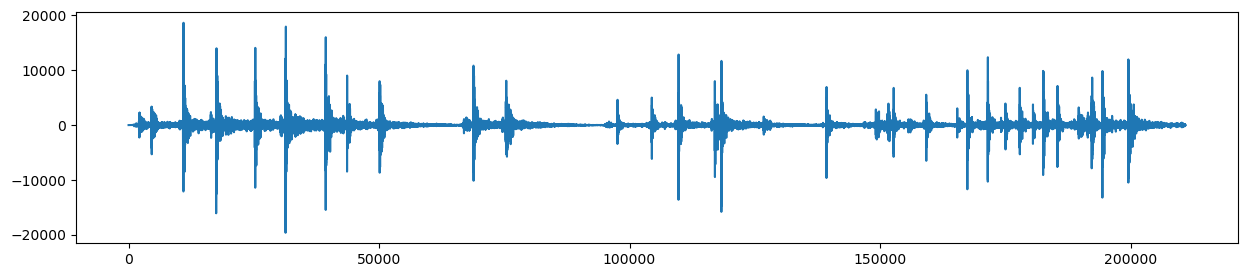

In [6]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(noise_data)

# stationary

In [28]:
reduced_noise = nr.reduce_noise(y = source_audio, sr=source_audio_sample_rate, y_noise = noise_data, n_std_thresh_stationary=1.5,stationary=True)

In [10]:
reduced_noise3 = nr.reduce_noise(y = source_audio.astype(np.float32), sr=source_audio_sample_rate, n_std_thresh_stationary=1.5,stationary=True,
                               use_torch=True,y_noise = noise_data.astype(np.float32))

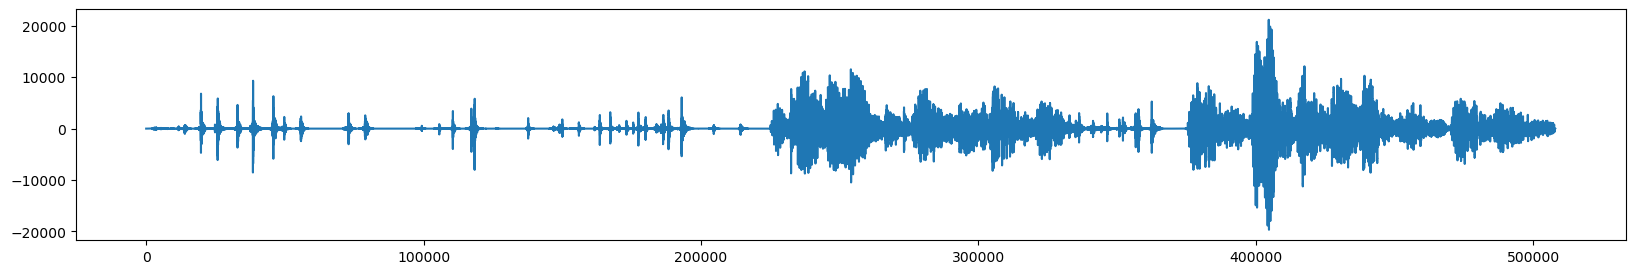

In [11]:
fig, ax = plt.subplots(figsize=(20,3))
# ax.plot(source_audio)
ax.plot(reduced_noise3)
# print(source_audio_sample_rate)

In [12]:
IPython.display.Audio(data=reduced_noise3, rate=source_audio_sample_rate)

In [42]:
output_aac = 'E:/temp/testVideo/three_types_of_voice_stationary_reduce.aac'
# 使用 pydub 创建 AudioSegment
raw_audio = reduced_noise.astype(np.int16).tobytes()
output_audio = AudioSegment.from_file(
    raw_audio,
    sample_width=audio.sample_width,  # 16-bit PCM
    frame_rate=source_audio_sample_rate,  # Adjust based on your requirements
    channels=audio.channels
)

# 使输出音频的格式与参考音频保持一致
output_audio.export(output_aac, format="aac")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 2100: invalid start byte

In [32]:
print(reduced_noise)

[0 0 0 ... 9 7 7]


non-stationary

In [52]:
reduced_noise2 = nr.reduce_noise(y = source_audio, sr=source_audio_sample_rate, thresh_n_mult_nonstationary=2,stationary=False)

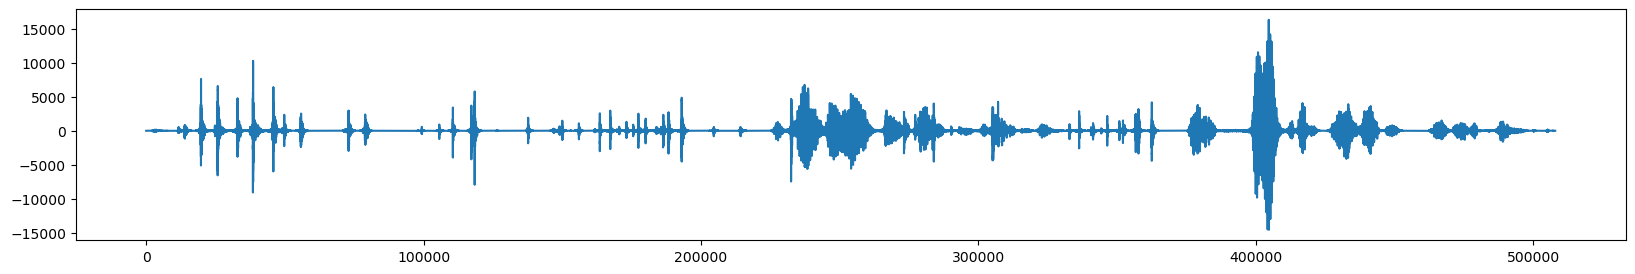

In [53]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise2)

In [54]:
IPython.display.Audio(data=reduced_noise2, rate=source_audio_sample_rate)

In [9]:
import os

# 获取当前工作目录
current_directory = os.getcwd()

# 打印当前工作目录
print("当前路径:", current_directory)

当前路径: D:\code\pycharm\videoNoiseReducer
